In [1]:
# 1.	Average Suicidal Rate among Veterans vs Overall Population: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
veterans_df = pd.read_csv("veteran_suicides_2005-2011.csv")
veterans_df.head()

,state,vet_pop_2005,overall_pop_18_2005,vet_pop_p_2005,vet_suicides_2005,all_suicides_2005,vet_suicides_p_2005,vet_pop_2006,overall_pop_18_2006,vet_pop_p_2006,...,vet_pop_p_2010,vet_suicides_2010,all_suicides_2010,vet_suicides_p_2010,vet_pop_2011,overall_pop_18_2011,vet_pop_p_2011,vet_suicides_2011,all_suicides_2011,vet_suicides_p_2011
0,Alabama,403950,3344721,0.120772,135,535,0.252336,408917,3473558,0.117723,...,0.110360,156,679,0.229750,395753,3662910,0.108043,163,680,0.239706
1,Alaska,74482,446969,0.166638,24,131,0.183206,70067,478581,0.146406,...,0.140705,35,164,0.213415,72407,517799,0.139836,27,142,0.190141
2,Arizona,538880,4238996,0.127124,225,945,0.238095,558906,4521911,0.123600,...,0.111217,240,1093,0.219579,533608,4842927,0.110183,242,1091,0.221815
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,258170,2110583,0.122322,...,0.112340,105,447,0.234899,238790,2221409,0.107495,89,447,0.199105
4,California,2193336,25543447,0.085867,633,3206,0.197442,2142367,26789221,0.079971,...,0.069784,705,3913,0.180169,1910994,28292703,0.067544,706,3923,0.179964


In [4]:
#Calculate the Suicides per 100,000 People:
vet_per_cap_suic_per_year_list = []
for year in np.arange(2005,2012,1):
       vet_per_cap_suic_per_year_list.append(((veterans_df[f"vet_suicides_{year}"].sum())/(veterans_df[f"vet_pop_{year}"].sum()))*100000)

non_vet_suic_per_year_list = []
for year in np.arange(2005,2012,1):
       non_vet_suic_per_year_list.append(((veterans_df[f"all_suicides_{year}"].sum()-veterans_df[f"vet_suicides_{year}"].sum())/(veterans_df[f"overall_pop_18_{year}"].sum()-veterans_df[f"vet_pop_{year}"].sum()))*100000)

gen_pop_suic_per_year_list = []
for year in np.arange(2005,2012,1):
       gen_pop_suic_per_year_list.append(((veterans_df[f"all_suicides_{year}"].sum())/(veterans_df[f"overall_pop_18_{year}"].sum()))*100000)

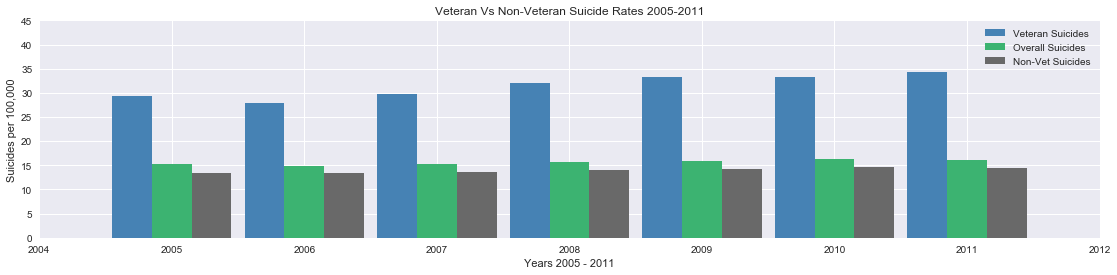

In [5]:
#Graph the Suicide Rates:
sns.set()
x = np.arange(2005, 2012, 1) 
plt.figure(figsize=(19,4))

plt.bar(x-.3, vet_per_cap_suic_per_year_list, label="Veteran Suicides", width=.3, color='steelblue')
plt.bar(x, gen_pop_suic_per_year_list, label="Overall Suicides",width=.3, color='mediumseagreen')
plt.bar(x+.3, non_vet_suic_per_year_list, label="Non-Vet Suicides",width=.3, color='dimgrey')

plt.xlabel("Years 2005 - 2011")
plt.ylabel("Suicides per 100,000")
plt.title("Veteran Vs Non-Veteran Suicide Rates 2005-2011")
plt.legend()
plt.xlim(2004, 2012)
plt.ylim(0, 45)
plt.show()

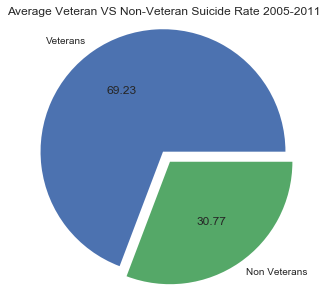

In [6]:
#Calculate the Suicides Rates per 100,000 People:
x = np.arange(2005,2012,1)
y1 = []
y2 = []
y3 = []
y4 = []

for year in np.arange(2005,2012,1):
    y1.append(veterans_df[f"vet_pop_{year}"].sum())
    y2.append(veterans_df[f"overall_pop_18_{year}"].sum()-veterans_df[f"vet_pop_{year}"].sum())
    y3.append(veterans_df[f"vet_suicides_{year}"].sum())
    y4.append(veterans_df[f"all_suicides_{year}"].sum()-veterans_df[f"vet_suicides_{year}"].sum())

plt.figure(figsize=(5,5))
plt.title("Average Veteran VS Non-Veteran Suicide Rate 2005-2011 ")
plt.pie(
    [np.mean(vet_per_cap_suic_per_year_list),np.mean(non_vet_suic_per_year_list)],
    explode=[.1,0],
    labels=["Veterans", "Non Veterans"],
    autopct='%.2f',
    pctdistance=.6
    #colors=['red', 'blue']
)
    
plt.axis("equal")
plt.show()

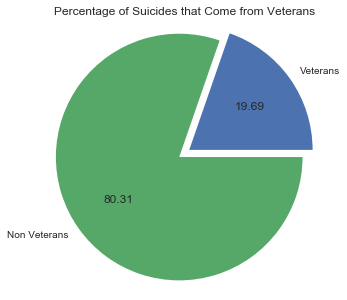

In [7]:
#What percentage of suicides come from veterans:
total_vet_suicides_list = []
total_non_vet_suicides_list = []
for year in np.arange(2005,2012,1):
    total_vet_suicides_list.append(veterans_df[f"vet_suicides_{year}"].sum())
    total_non_vet_suicides_list.append(veterans_df[f"all_suicides_{year}"].sum()-veterans_df[f"vet_suicides_{year}"].sum())
total_vet_suicides = np.sum(total_vet_suicides_list)
total_non_vet_suicides = np.sum(total_non_vet_suicides_list)

plt.figure(figsize=(5,5))
plt.title("Percentage of Suicides that Come from Veterans")
plt.pie(
    [total_vet_suicides, total_non_vet_suicides],
    explode=[.1,0],
    labels=["Veterans", "Non Veterans"],
    autopct='%.2f',
    pctdistance=.6
)
plt.axis('equal')
plt.show()

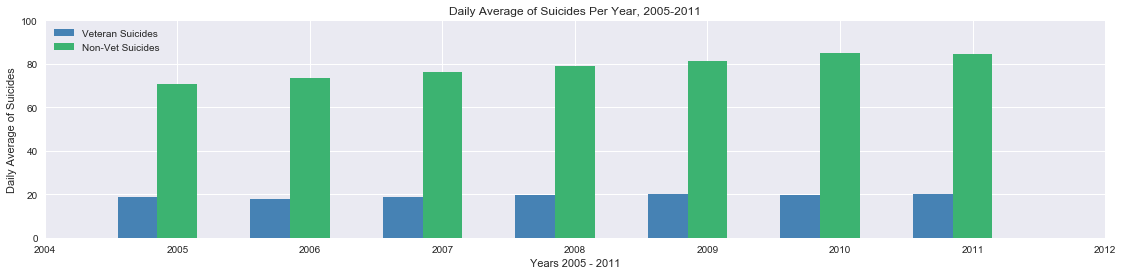

In [8]:
#Daily Average of Veteran Suicides
sns.set()
x = np.arange(2005, 2012, 1) 
plt.figure(figsize=(19,4))

plt.bar(x-.3, np.divide(total_vet_suicides_list, 365), label="Veteran Suicides", width=.3, color='steelblue')
plt.bar(x, (np.divide(total_non_vet_suicides_list, 365)) , label="Non-Vet Suicides",width=.3, color='mediumseagreen')
#plt.bar(x+.3, non_vet_suic_per_year_list, label="Non-Vet Suicides",width=.3, color='dimgrey')

plt.xlabel("Years 2005 - 2011")
plt.ylabel("Daily Average of Suicides")
plt.title("Daily Average of Suicides Per Year, 2005-2011")
plt.legend()
plt.xlim(2004, 2012)
plt.ylim(0, 100)
plt.show()

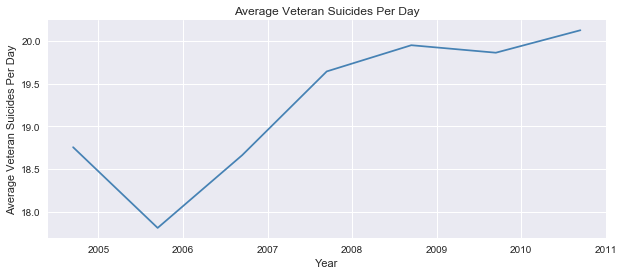

In [9]:
sns.set()
x = np.arange(2005, 2012, 1)
plt.figure(figsize=(10,4))
plt.title("Average Veteran Suicides Per Day")
plt.xlabel("Year")
plt.ylabel("Average Veteran Suicides Per Day")
plt.plot(x-.3, np.divide(total_vet_suicides_list, 365), label="Average Veteran Suicides Per Day", color='steelblue')
plt.show()